In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np


# Fitting a light curve


This example shows how to fit the parameters of a SALT2 model to photometric
light curve data.

First, we'll load an example of some photometric data.



In [89]:
from __future__ import print_function

import sncosmo

data1 = sncosmo.load_example_data()

print(data1)

     time      band       flux         fluxerr      zp  zpsys
------------- ----- --------------- -------------- ---- -----
      55070.0 sdssg   0.36351153597 0.672843847541 25.0    ab
55072.0512821 sdssr -0.200801295864 0.672843847541 25.0    ab
55074.1025641 sdssi  0.307494232981 0.672843847541 25.0    ab
55076.1538462 sdssz   1.08776103656 0.672843847541 25.0    ab
55078.2051282 sdssg  -0.43667895645 0.672843847541 25.0    ab
55080.2564103 sdssr   1.09780966779 0.672843847541 25.0    ab
55082.3076923 sdssi    3.7562685627 0.672843847541 25.0    ab
55084.3589744 sdssz   5.34858894966 0.672843847541 25.0    ab
55086.4102564 sdssg   2.82614187269 0.672843847541 25.0    ab
55088.4615385 sdssr   7.56547045054 0.672843847541 25.0    ab
          ...   ...             ...            ...  ...   ...
55129.4871795 sdssr    2.6597485586 0.672843847541 25.0    ab
55131.5384615 sdssi   3.99520404021 0.672843847541 25.0    ab
55133.5897436 sdssz   5.73989458094 0.672843847541 25.0    ab
55135.64

An important additional note: a table of photometric data has a
``band`` column and a ``zpsys`` column that use strings to identify
the bandpass (e.g., ``'sdssg'``) and zeropoint system (``'ab'``) of
each observation. If the bandpass and zeropoint systems in your data
are *not* built-ins known to sncosmo, you must register the
corresponding `~sncosmo.Bandpass` or `~sncosmo.MagSystem` to the
right string identifier using the registry.



In [126]:
# ?? sncosmo.fit_lc()

In [228]:
# sncosmo.Bandpass

SyntaxError: invalid syntax (<ipython-input-228-7e49a45f38a2>, line 1)

In [131]:
# create a model
model = sncosmo.Model(source='salt2')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data1, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)

The first object returned is a dictionary-like object where the keys
can be accessed as attributes in addition to the typical dictionary
lookup like ``result['ncall']``:



In [132]:
print("Number of chi^2 function calls:", result.ncall)
print("Number of degrees of freedom in fit:", result.ndof)
print("chi^2 value at minimum:", result.chisq)
print("model parameters:", result.param_names)
print("best-fit values:", result.parameters)
print("The result contains the following attributes:\n", result.keys())

Number of chi^2 function calls: 133
Number of degrees of freedom in fit: 35
chi^2 value at minimum: 33.80988236076297
model parameters: ['z', 't0', 'x0', 'x1', 'c']
best-fit values: [5.15154859e-01 5.51004778e+04 1.19625368e-05 4.67270999e-01
 1.93951997e-01]
The result contains the following attributes:
 dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])


The second object returned is a shallow copy of the input model with
the parameters set to the best fit values. The input model is
unchanged.



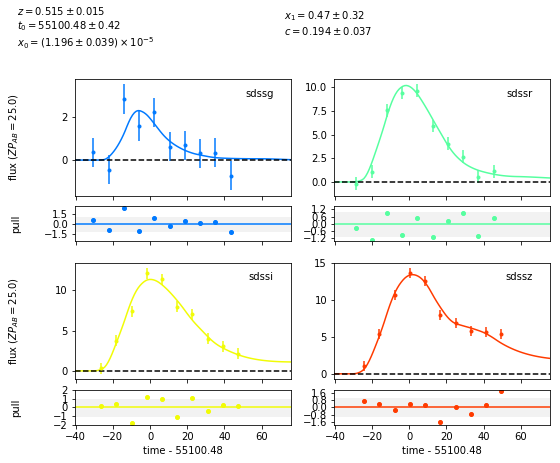

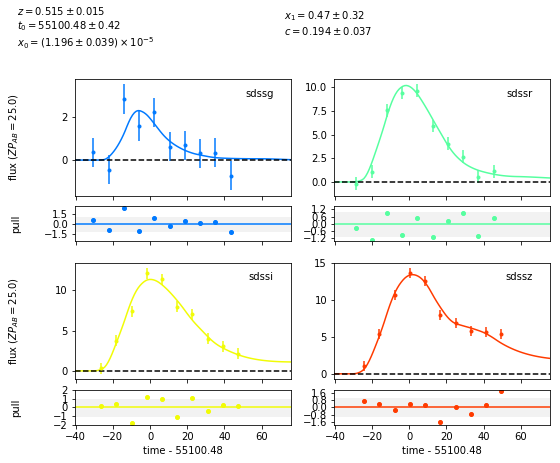

In [133]:
sncosmo.plot_lc(data1, model=fitted_model, errors=result.errors)

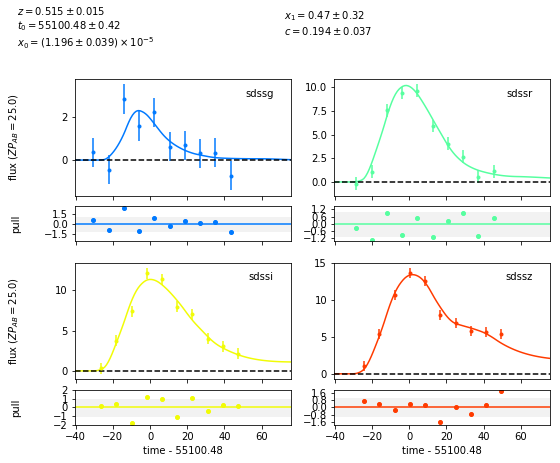

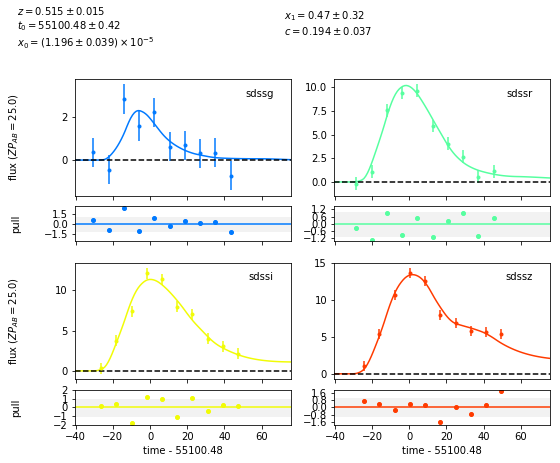

In [7]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)

Suppose we already know the redshift of the supernova we're trying to
fit.  We want to set the model's redshift to the known value, and then
make sure not to vary `z` in the fit.



In [ ]:
# change the zp and see how it effects - data1 original example, data -- changed
for n in range (0,len(data)):
    data['zp'][n] = 22

In [ ]:
data[data['flux']==data['flux'].max()]

In [134]:
# create a model
model = sncosmo.Model(source='salt2')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)

In [135]:
print("Number of chi^2 function calls:", result.ncall)
print("Number of degrees of freedom in fit:", result.ndof)
print("chi^2 value at minimum:", result.chisq)
print("model parameters:", result.param_names)
print("best-fit values:", result.parameters)
print("The result contains the following attributes:\n", result.keys())

Number of chi^2 function calls: 133
Number of degrees of freedom in fit: 35
chi^2 value at minimum: 33.809882360762884
model parameters: ['z', 't0', 'x0', 'x1', 'c']
best-fit values: [5.15154859e-01 5.51004778e+04 1.89593431e-04 4.67270999e-01
 1.93951997e-01]
The result contains the following attributes:
 dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])


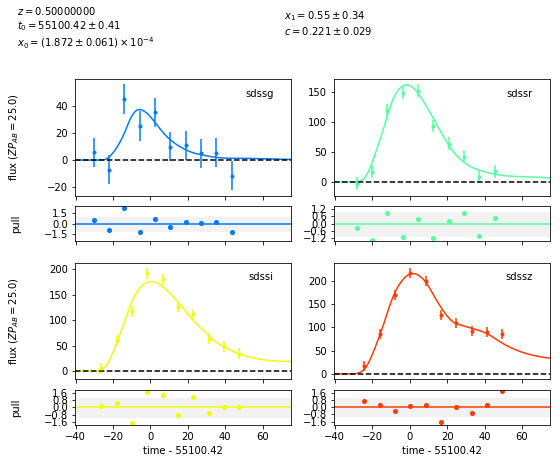

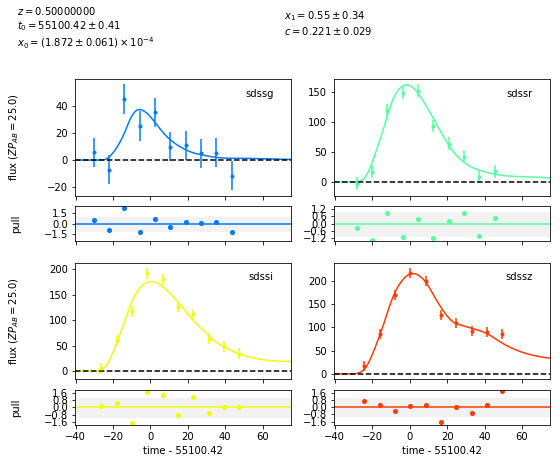

In [136]:
model.set(z=0.5)  # set the model's redshift.
result, fitted_model = sncosmo.fit_lc(data, model,
                                      ['t0', 'x0', 'x1', 'c'])
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)

In [9]:
### creating lc final data table and pass bands with parameters

In [142]:
cd cfalc_J06snIa/

[Errno 2] No such file or directory: 'cfalc_J06snIa/'
/Users/natalie/git/SNIa/data/cfalc_J06snIa


In [143]:
!ls

lc_data.tsv        sn1998D_UBVRI.dat  sn1998eg_UBVRI.dat sn1999gd_UBVRI.dat
passband.tsv       sn1998V_UBVRI.dat  sn1998es_UBVRI.dat sn1999gh_UBVRI.dat
sn1997E_UBVRI.dat  sn1998ab_UBVRI.dat sn1999X_UBVRI.dat  sn1999gp_UBVRI.dat
sn1997Y_UBVRI.dat  sn1998bp_UBVRI.dat sn1999aa_UBVRI.dat sn2000B_UBVRI.dat
sn1997bp_UBVRI.dat sn1998co_UBVRI.dat sn1999ac_UBVRI.dat sn2000ce_UBVRI.dat
sn1997bq_UBVRI.dat sn1998de_UBVRI.dat sn1999cc_UBVRI.dat sn2000cf_UBVRI.dat
sn1997br_UBVRI.dat sn1998dh_UBVRI.dat sn1999cl_UBVRI.dat sn2000cn_UBVRI.dat
sn1997cn_UBVRI.dat sn1998dk_UBVRI.dat sn1999cw_UBVRI.dat sn2000cx_UBVRI.dat
sn1997cw_UBVRI.dat sn1998dm_UBVRI.dat sn1999dq_UBVRI.dat sn2000dk_UBVRI.dat
sn1997dg_UBVRI.dat sn1998dx_UBVRI.dat sn1999ef_UBVRI.dat sn2000fa_UBVRI.dat
sn1997do_UBVRI.dat sn1998ec_UBVRI.dat sn1999ej_UBVRI.dat sn_lc.csv
sn1997dt_UBVRI.dat sn1998ef_UBVRI.dat sn1999ek_UBVRI.dat


In [312]:
!head -100 lc_data.tsv

#
#   VizieR Astronomical Server vizier.cfa.harvard.edu
#    Date: 2018-08-16T10:33:35 [V1.99+ (14-Oct-2013)]
#   In case of problem, please report to:	cds-question@unistra.fr
#
#
#Coosys	J2000:	eq_FK5 J2000
#INFO	votable-version=1.99+ (14-Oct-2013)	
#INFO	-ref=VIZ5b7552dde776	
#INFO	-out.max=unlimited	
#INFO	queryParameters=20	
#-oc.form=dec
#-out.max=unlimited
#-out.all=2
#-order=I
#-out.src=J/AJ/131/527/table4
#-nav=cat:J/AJ/131/527&tab:{J/AJ/131/527/table4}&key:source=J/AJ/131/527/table4&HTTPPRM:&&-ref=VIZ5b7552dde776&-out.max=50&-out.form=HTML Table&-oc.form=sexa&-order=I&-out=SN&-out=HJD&-out=Umag&-out=e_Umag&-out=Bmag&-out=e_Bmag&-out=Vmag&-out=e_Vmag&-out=Rcmag&-out=e_Rcmag&-out=Icmag&-out=e_Icmag&-out=Det/Filt&-file=.&-meta.ucd=0&-meta=0&-usenav=1&-bmark=POST&-out.src=J/AJ/131/527/table4
#-source=J/AJ/131/527/table4
#-out=SN
#-out=HJD
#-out=Umag
#-out=e_Umag
#-out=Bmag
#-out=e_Bmag
#-out=Vmag
#-out=e_Vmag
#-out=Rcmag
#-out=e_Rcmag
#-out=Icmag
#-out=e_Icmag
#-out=Det/Filt
#

#R

In [150]:
cat sn1997E_UBVRI.dat

# sn97E.ubvri.snphot.dat
# photometry from Jha et al. 2006, AJ 131, 527
#
#  HJD         U    +/-      B    +/-      V    +/-      R    +/-      I    +/-
2450464.92  99.999 9.999  15.694 0.017  15.598 0.011  15.377 0.015  99.999 9.999
2450465.69  15.441 0.038  15.667 0.015  15.544 0.010  15.357 0.013  15.423 0.014
2450466.78  15.414 0.036  15.656 0.013  15.502 0.008  15.323 0.011  15.468 0.011
2450468.66  15.500 0.037  15.620 0.014  15.492 0.010  15.322 0.012  15.480 0.013
2450472.66  15.789 0.037  15.779 0.013  15.491 0.008  15.323 0.013  15.638 0.012
2450476.89  16.330 0.061  16.166 0.032  15.741 0.023  15.716 0.030  15.940 0.032
2450479.87  16.802 0.037  16.547 0.013  15.933 0.008  15.906 0.011  16.006 0.011
2450485.62  17.725 0.041  17.381 0.015  16.301 0.009  16.003 0.013  15.847 0.018
2450489.77  99.999 9.999  17.891 0.022  16.627 0.014  16.131 0.019  15.823 0.019
2450512.65  19.247 0.060  18.929 0.025  17.829 0.016  17.448 0.026  17.296 0.023
2450521.62  19.383 0.186  19.147 0.0

In [14]:
#creating the list of SNe from the files
import glob
import os
pathlist = glob.glob('/Users/natalie/git/SNIa/data/cfalc_J06snIa/*.dat')  #path and extension of interest
listlen = len(pathlist)
snlist = []
file = []
for n in range(0, listlen):
    path = pathlist[n].split(os.sep)  #split the path (temp for current path)
    file.append(path[7])   #create a list of sn (by folder)
    name = file[n].split('_')
    snlist.append(name[0])   #create a list of sn (by folder)

In [15]:
#exporting the SNe list to a file
import csv
csvfile = "/Users/natalie/git/SNIa/data/cfalc_J06snIa/sn_lc.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in snlist:
        writer.writerow([val]) 

In [147]:
snlist

['sn1997bp',
 'sn1997bq',
 'sn1997br',
 'sn1997cn',
 'sn1997cw',
 'sn1997dg',
 'sn1997do',
 'sn1997dt',
 'sn1997E',
 'sn1997Y',
 'sn1998ab',
 'sn1998bp',
 'sn1998co',
 'sn1998D',
 'sn1998de',
 'sn1998dh',
 'sn1998dk',
 'sn1998dm',
 'sn1998dx',
 'sn1998ec',
 'sn1998ef',
 'sn1998eg',
 'sn1998es',
 'sn1998V',
 'sn1999aa',
 'sn1999ac',
 'sn1999cc',
 'sn1999cl',
 'sn1999cw',
 'sn1999dq',
 'sn1999ef',
 'sn1999ej',
 'sn1999ek',
 'sn1999gd',
 'sn1999gh',
 'sn1999gp',
 'sn1999X',
 'sn2000B',
 'sn2000ce',
 'sn2000cf',
 'sn2000cn',
 'sn2000cx',
 'sn2000dk',
 'sn2000fa']

In [192]:
#creating other relevant lists for each SN
for n in snlist:
    lc_data = pandas.read_csv('/Users/natalie/git/SNIa/data/cfalc_J06snIa/lc_data.tsv', skiprows=55, sep='\t', names=['SN','HJD(d)','U(mag)','eU(mag)','B(mag)','eB(mag)','V(mag)','eV(mag)','Rc(mag)','eRc(mag)','Ic(mag)','eIc(mag)','inst'])
    

In [193]:
lc_data.head(10)

,SN,HJD(d),U(mag),eU(mag),B(mag),eB(mag),V(mag),eV(mag),Rc(mag),eRc(mag),Ic(mag),eIc(mag),inst
0,1997E,2450464.92,,,15.694,0.017,15.598,0.011,15.377,0.015,,,AndyCam/SAO
1,1997E,2450465.69,15.441,0.038,15.667,0.015,15.544,0.010,15.357,0.013,15.423,0.014,AndyCam/SAO
2,1997E,2450466.78,15.414,0.036,15.656,0.013,15.502,0.008,15.323,0.011,15.468,0.011,AndyCam/SAO
3,1997E,2450468.66,15.500,0.037,15.620,0.014,15.492,0.010,15.322,0.012,15.480,0.013,AndyCam/SAO
4,1997E,2450472.66,15.789,0.037,15.779,0.013,15.491,0.008,15.323,0.013,15.638,0.012,AndyCam/SAO
5,1997E,2450476.89,16.330,0.061,16.166,0.032,15.741,0.023,15.716,0.030,15.940,0.032,AndyCam/SAO
6,1997E,2450479.87,16.802,0.037,16.547,0.013,15.933,0.008,15.906,0.011,16.006,0.011,AndyCam/SAO
7,1997E,2450485.62,17.725,0.041,17.381,0.015,16.301,0.009,16.003,0.013,15.847,0.018,AndyCam/SAO
8,1997E,2450489.77,,,17.891,0.022,16.627,0.014,16.131,0.019,15.823,0.019,AndyCam/SAO
9,1997E,2450512.65,19.247,0.060,18.929,0.025,17.829,0.016,17.448,0.026,17.296,0.023,AndyCam/SAO


In [233]:
#lc_data.inst.count('AndyCam/Harris+I_{SAO}')
from collections import Counter 
Counter(lc_data.inst)

Counter({'AndyCam/SAO': 133,
         '4Sh-chip1/SAO': 65,
         '4sh-chip3/SAO': 24,
         '4sh-chip3/Harris+I_{SAO}': 40,
         'AndyCam/Harris+I_{SAO}': 20,
         '4sh-chip3/Harris': 203,
         'AndyCam/Harris': 1})

In [288]:
# building the table to put into SALT2 for fit
from astropy.table import Table, vstack

bands = ['U','B','V','Rc','Ic']
sn = lc_data.SN.unique() #all sne in data

sni = []  #current sn 

#everything needed for chart
time = []
band = []
zp = []
zpsys = []
flux = []
fluxerr = []

bandU = []
magU = []
e_magU = []

bandB = []
magB = []
e_magB = []

bandV = []
magV = []
e_magV = []

bandRc = []
magRc = []
e_magRc = []

bandIc = []
magIc = []
e_magIc = []


for n in sn:                                                #each supernova
    for i in range (0,len(lc_data)):                        #searching for it in lc_data
        if n==lc_data['SN'].loc[i]:
            sni.append(lc_data['SN'].loc[i])
            time.append(lc_data['HJD(d)'].loc[i])           #applying the date
            zp.append('0')                                  #apply the desired zeropoint value
            zpsys.append('ab')                             #apply the correct mag sys from paper
            if lc_data['inst'].loc[i]=='AndyCam/Harris' or lc_data['inst'].loc[i]=='AndyCam/Harris+I_{SAO}':     #find the bandpass
                band.append('Andy/Har')
                bandU.append(band[i]+'_U')
                bandB.append(band[i]+'_B')
                bandV.append(band[i]+'_V')
                bandRc.append(band[i]+'_Rc')
                bandIc.append(band[i]+'_Ic')
            elif lc_data['inst'].loc[i]=='AndyCam/SAO':
                band.append('Andy/SAO')
                bandU.append(band[i]+'_U')
                bandB.append(band[i]+'_B')
                bandV.append(band[i]+'_V')
                bandRc.append(band[i]+'_Rc')
                bandIc.append(band[i]+'_Ic')
            elif lc_data['inst'].loc[i]=='4sh-chip3/Harris+I_{SAO}' or lc_data['inst'].loc[i]=='4sh-chip3/Harris':
                band.append('4Shoot/Har')
                bandU.append(band[i]+'_U')
                bandB.append(band[i]+'_B')
                bandV.append(band[i]+'_V')
                bandRc.append(band[i]+'_Rc')
                bandIc.append(band[i]+'_Ic')
            elif lc_data['inst'].loc[i]=='4Sh-chip1/SAO' or lc_data['inst'].loc[i]=='4sh-chip3/SAO':
                band.append('4Shoot/SAO')
                bandU.append(band[i]+'_U')
                bandB.append(band[i]+'_B')
                bandV.append(band[i]+'_V')
                bandRc.append(band[i]+'_Rc')
                bandIc.append(band[i]+'_Ic')
            else:
                print(lc_data['inst'].loc[i])
            magU.append(lc_data['U(mag)'].loc[i])
            e_magU.append(lc_data['eU(mag)'].loc[i])
            magB.append(lc_data['B(mag)'].loc[i])
            e_magB.append(lc_data['eB(mag)'].loc[i])
            magV.append(lc_data['V(mag)'].loc[i])
            e_magV.append(lc_data['eV(mag)'].loc[i])
            magRc.append(lc_data['Rc(mag)'].loc[i])
            e_magRc.append(lc_data['eRc(mag)'].loc[i])
            magIc.append(lc_data['Ic(mag)'].loc[i])
            e_magIc.append(lc_data['eIc(mag)'].loc[i])
    tableU = Table([sni, time, zp, zpsys, bandU, magU, e_magU], names=('sn', 'time', 'zp', 'zpsys', 'band', 'flux', 'fluxerr'))
    tableB = Table([sni, time, zp, zpsys, bandU, magB, e_magB], names=('sn', 'time', 'zp', 'zpsys', 'band', 'flux', 'fluxerr'))
    tableV = Table([sni, time, zp, zpsys, bandU, magV, e_magV], names=('sn', 'time', 'zp', 'zpsys', 'band', 'flux', 'fluxerr'))
    tableRc = Table([sni, time, zp, zpsys, bandU, magRc, e_magRc], names=('sn', 'time', 'zp', 'zpsys', 'band', 'flux', 'fluxerr'))
    tableIc = Table([sni, time, zp, zpsys, bandU, magIc, e_magIc], names=('sn', 'time', 'zp', 'zpsys', 'band', 'flux', 'fluxerr'))

                            

In [289]:
#final table with all sne and all bands
table = vstack([tableU, tableB, tableV, tableRc, tableIc])
table

sn,time,zp,zpsys,band,flux,fluxerr
str6,float64,str1,str2,str12,str6,str6
1997E,2450464.92,0,ab,Andy/SAO_U,,
1997E,2450465.69,0,ab,Andy/SAO_U,15.441,0.038
1997E,2450466.78,0,ab,Andy/SAO_U,15.414,0.036
1997E,2450468.66,0,ab,Andy/SAO_U,15.500,0.037
1997E,2450472.66,0,ab,Andy/SAO_U,15.789,0.037
1997E,2450476.89,0,ab,Andy/SAO_U,16.330,0.061
1997E,2450479.87,0,ab,Andy/SAO_U,16.802,0.037
1997E,2450485.62,0,ab,Andy/SAO_U,17.725,0.041
1997E,2450489.77,0,ab,Andy/SAO_U,,


In [313]:
table[table['sn'] == '1997E ']

sn,time,zp,zpsys,band,flux,fluxerr
str6,float64,str1,str2,str12,str6,str6
1997E,2450464.92,0,ab,Andy/SAO_U,,
1997E,2450465.69,0,ab,Andy/SAO_U,15.441,0.038
1997E,2450466.78,0,ab,Andy/SAO_U,15.414,0.036
1997E,2450468.66,0,ab,Andy/SAO_U,15.500,0.037
1997E,2450472.66,0,ab,Andy/SAO_U,15.789,0.037
1997E,2450476.89,0,ab,Andy/SAO_U,16.330,0.061
1997E,2450479.87,0,ab,Andy/SAO_U,16.802,0.037
1997E,2450485.62,0,ab,Andy/SAO_U,17.725,0.041
1997E,2450489.77,0,ab,Andy/SAO_U,,


In [245]:
bands = ['U','B','V','Rc','Ic']
for m in bands:
    print(str(m)+'(mag)')

U(mag)
B(mag)
V(mag)
Rc(mag)
Ic(mag)


In [178]:
#(lc_data['U(mag)'].loc[0])=np.NAN
#type(lc_data['U(mag)'].loc[0]) #changes to float

/Users/natalie/anaconda2/envs/fun/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
# creating the pass bands for cfa2

In [151]:
!head -60 passband.tsv

#
#   VizieR Astronomical Server vizier.cfa.harvard.edu
#    Date: 2018-08-16T12:01:10 [V1.99+ (14-Oct-2013)]
#   In case of problem, please report to:	cds-question@unistra.fr
#
#
#Coosys	J2000:	eq_FK5 J2000
#INFO	votable-version=1.99+ (14-Oct-2013)	
#INFO	-ref=VIZ5b755ad110aea	
#INFO	-out.max=unlimited	
#INFO	queryParameters=13	
#-oc.form=dec
#-out.max=unlimited
#-out.all=2
#-order=I
#-out.src=J/AJ/131/527/table5
#-nav=cat:J/AJ/131/527&tab:{J/AJ/131/527/table5}&key:source=J/AJ/131/527/table5&HTTPPRM:&&-ref=VIZ5b755ad110aea&-out.max=50&-out.form=HTML Table&-oc.form=sexa&-order=I&-out=Filter&-out=lambda&-out=Andy/SAO&-out=Andy/Har&-out=4Shoot/SAO&-out=4Shoot/Har&-file=.&-meta.ucd=2&-meta=1&-meta.foot=1&-usenav=1&-bmark=POST&-out.src=J/AJ/131/527/table5
#-source=J/AJ/131/527/table5
#-out=Filter
#-out=lambda
#-out=Andy/SAO
#-out=Andy/Har
#-out=4Shoot/SAO
#-out=4Shoot/Har
#

#RESOURCE=yCat_51310527
#Name: J/AJ/131/527
#Title: UBVRI light curves of 44 type Ia supernovae (Jha+, 2006)
#Table	

In [18]:
# scaning the data and changing the wavelength to angstrem (needed for sncosmos)
pass_band = pandas.read_csv('/Users/natalie/git/SNIa/data/cfalc_J06snIa/passband.tsv', skiprows=41, sep='\s+', error_bad_lines=False, header=None)
pass_band.columns = ["Filter", "wl_ang", "Andy/SAO", "Andy/Har", "4Shoot/SAO", "4Shoot/Har"]
for n in range(0,len(pass_band['Filter'])):
   (pass_band.loc[n,'wl_ang']) = ((pass_band.loc[n,'wl_ang'])*(10))

In [19]:
pass_band

,Filter,wl_ang,Andy/SAO,Andy/Har,4Shoot/SAO,4Shoot/Har
0,U,2950,0.000,0.000,0.000,0.000
1,U,3000,0.000,0.011,0.000,0.009
2,U,3050,0.000,0.060,0.000,0.048
3,U,3100,0.000,0.149,0.000,0.117
4,U,3150,0.002,0.264,0.002,0.206
5,U,3200,0.023,0.381,0.018,0.296
6,U,3250,0.089,0.493,0.067,0.382
7,U,3300,0.194,0.592,0.148,0.459
8,U,3350,0.326,0.673,0.250,0.527
9,U,3400,0.465,0.745,0.362,0.591


In [28]:
#registering the bands
unq = pass_band['Filter'].unique()
pb_list = []
#for Andy/SAO
for n in unq:
    band = sncosmo.Bandpass(list(pass_band[pass_band['Filter'] == n]['wl_ang']), list(pass_band[pass_band['Filter'] == n]['Andy/SAO']), name='Andy/SAO_'+str(n))
    sncosmo.registry.register(band, ('Andy/SAO_'+str(n)), force=True)
    pb_list.append('Andy/SAO_'+str(n))
    #for Andy/Har
for n in unq:
    band = sncosmo.Bandpass(list(pass_band[pass_band['Filter'] == n]['wl_ang']), list(pass_band[pass_band['Filter'] == n]['Andy/Har']), name='Andy/Har_'+str(n))
    sncosmo.registry.register(band, ('Andy/Har_'+str(n)), force=True)
    pb_list.append('Andy/Har_'+str(n))
    #for 4Shoot/SAO
for n in unq:
    band = sncosmo.Bandpass(list(pass_band[pass_band['Filter'] == n]['wl_ang']), list(pass_band[pass_band['Filter'] == n]['4Shoot/SAO']), name='4Shoot/SAO_'+str(n))
    sncosmo.registry.register(band, ('4Shoot/SAO_'+str(n)), force=True)
    pb_list.append('4Shoot/SAO_'+str(n))
    #4Shoot/Har
for n in unq:
    band = sncosmo.Bandpass(list(pass_band[pass_band['Filter'] == n]['wl_ang']), list(pass_band[pass_band['Filter'] == n]['4Shoot/Har']), name='4Shoot/Har_'+str(n))
    sncosmo.registry.register(band, ('4Shoot/Har_'+str(n)), force=True)
    pb_list.append('4Shoot/Har_'+str(n))


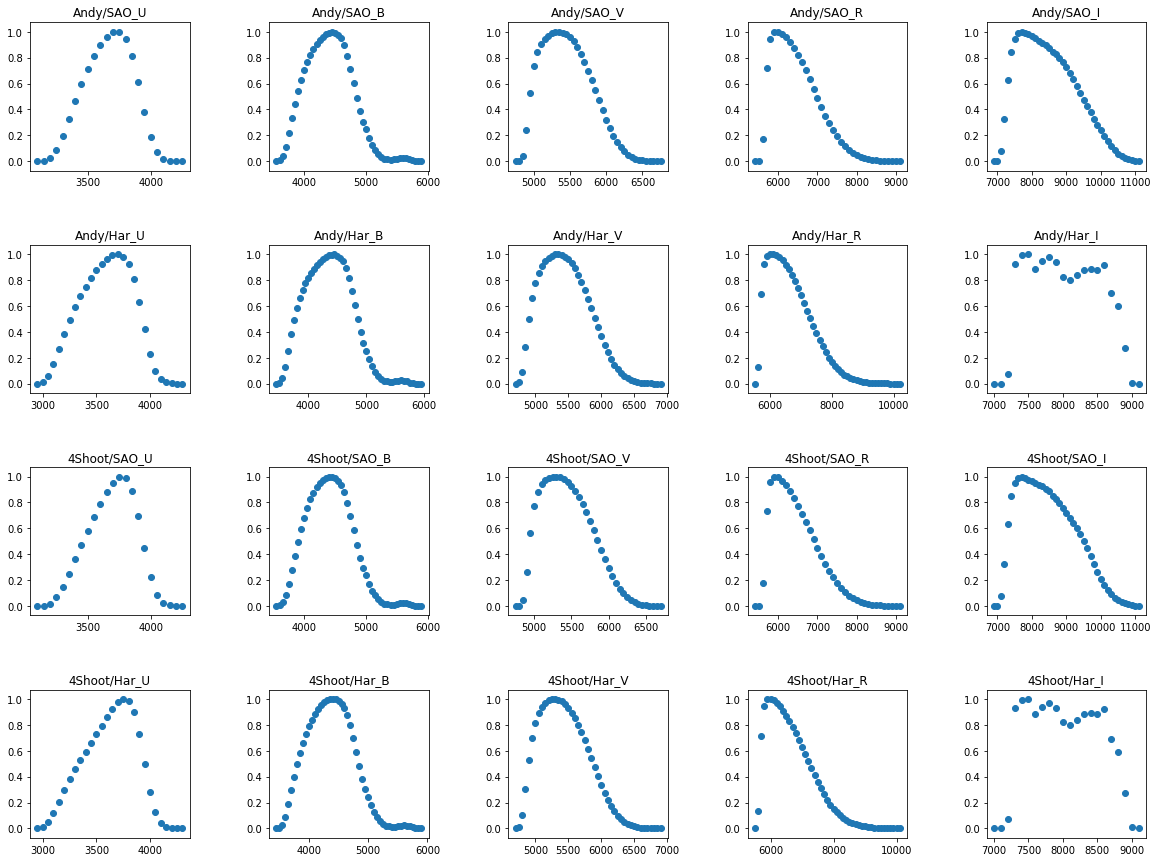

In [49]:
# displaying all filters in all bands
i=1;
fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig
for n in pb_list:
    band = sncosmo.get_bandpass(n)
    fig.add_subplot(4, 5, i)
    plt.scatter(band.wave,band.trans)
    plt.title(n)
    i=i+1
plt.show()


In [139]:
list(pass_band[pass_band['Filter'] == 'U']['wl_ang'])

[2950,
 3000,
 3050,
 3100,
 3150,
 3200,
 3250,
 3300,
 3350,
 3400,
 3450,
 3500,
 3550,
 3600,
 3650,
 3700,
 3750,
 3800,
 3850,
 3900,
 3950,
 4000,
 4050,
 4100,
 4150,
 4200,
 4250,
 4300]